In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src import support as sp



#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# READING FILES 

df_full = pd.read_csv('../Files/full_data_clean.csv')
df_flight = pd.read_csv('../Files/flight_clean.csv')
df_loyalty = pd.read_csv('../Files/loyalty_clean.csv')


In [30]:
# SORTING COLUMNS BY TYPE

numerics = df_full.select_dtypes(exclude = ['O','category']).columns
categorics = df_full.select_dtypes(exclude = 'number').columns

#### G1. HEATMAT: CORRELATIONAL GRAPH

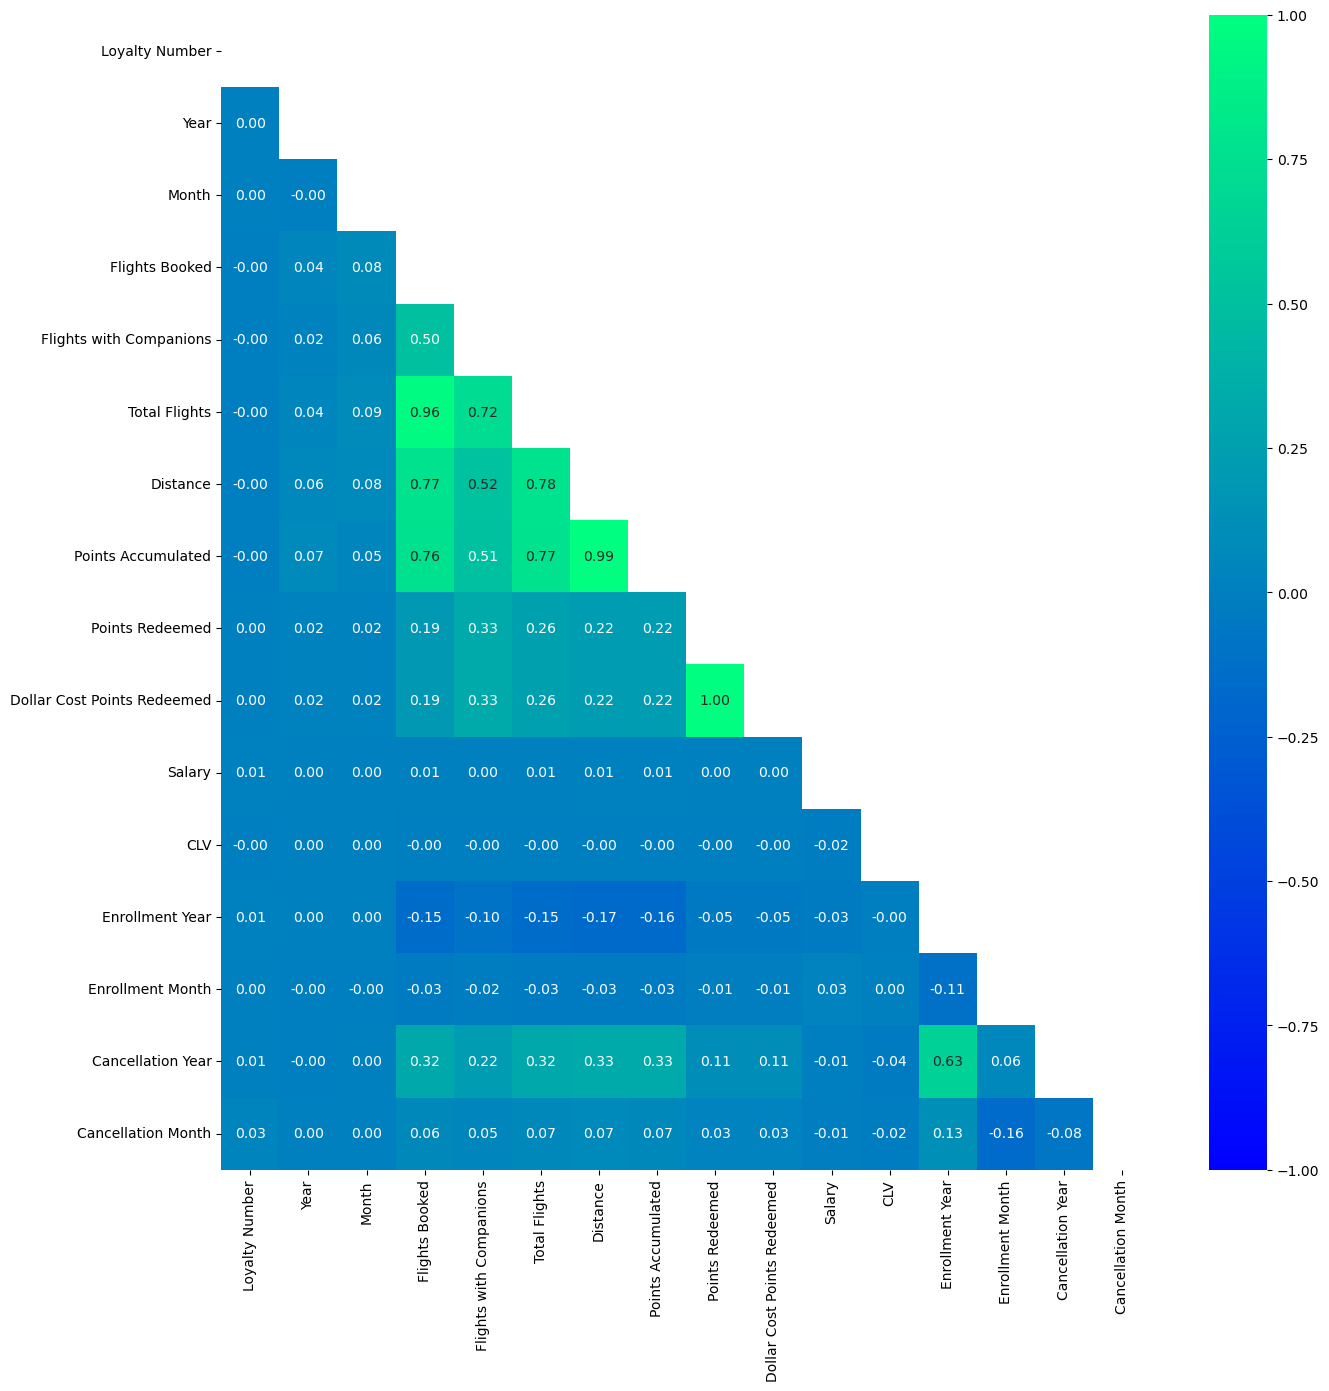

In [ ]:
# HEATMAP TO UNSDERSTAND CORRELATION BETWEEN VARIABLES

df_corr = df_full[numerics].corr(method = 'pearson') # PEARSON METHOD USED TO FIND LINEAR INTERACTIONS, NOTE: CORRELATION USING SPEARMAN WAS REVIEWED AND SAME STRON CORRELATIONS WERE FOUND.
#df_corr = df_full[numerics].corr(method = 'spearman') # LESS AFFECTED BY DEVIATION

plt.figure(figsize = (15, 15))

mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", # FORMAT FOR 2 DECIMALS
            cmap = "winter", # COLOR SCHEME
            vmax = 1, 
            vmin = -1, 
            mask = mask); 


#### G2. REGPLOT: CORRELATION ENROLLMENT & CANCELATION YEAR 

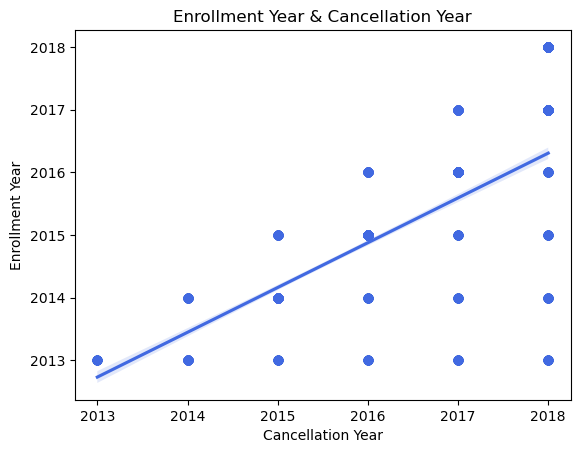

'There is a strong positive relation between the amount of new clients and cancelation'

In [32]:
# ANALYSING STRONG CORRELATION BETWEEN THESE VARIABLES

sns.regplot(data=df_loyalty, 
            y='Enrollment Year', 
            x='Cancellation Year', 
            color = 'royalblue')

plt.title('Enrollment Year & Cancellation Year')
plt.show() # TO OCULT COMMENTS

"""There is a strong positive relation between the amount of new clients and cancelation"""


#### G3. HISTPLOT & BOXPLOT: UNDERSTANDING SALARIES

Text(0.5, 1.0, 'Salary Distribution (Boxplot)')

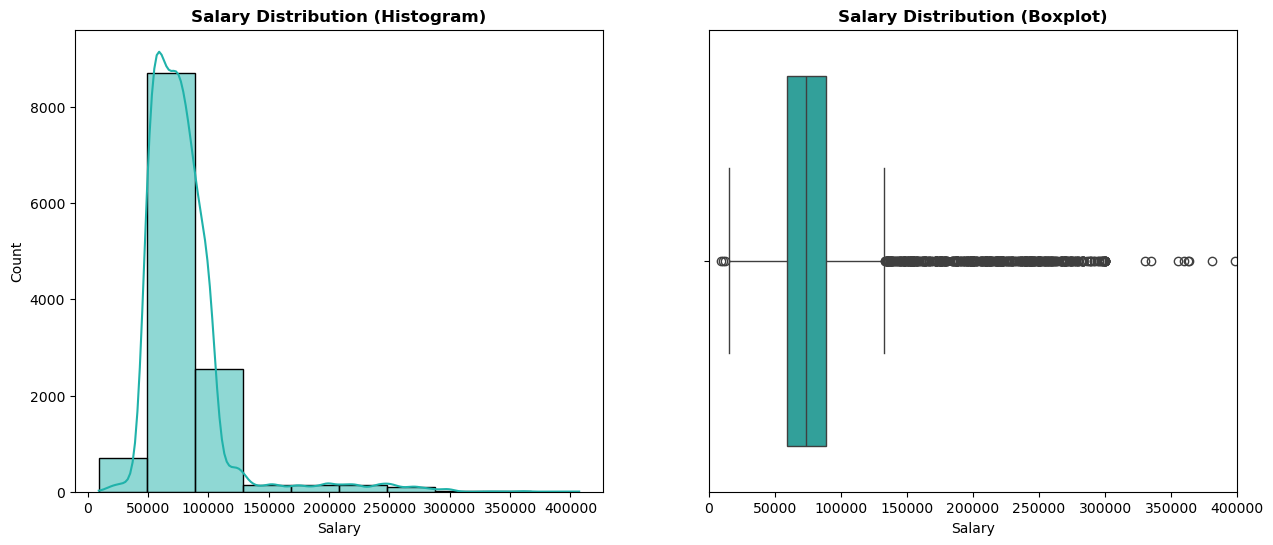

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# GRATH 1
sns.histplot(data=df_loyalty, 
             x='Salary', 
             bins=10, 
             kde=True, 
             color='lightseagreen', 
             ax=axes[0])
axes[0].set_title("Salary Distribution (Histogram)", fontweight='bold')

# GRATH 2
sns.boxplot(data=df_loyalty, 
            x='Salary', 
            color='lightseagreen', 
            ax=axes[1]) 
axes[1].set_xlim(0, 400000) # DETERMINATING EXTENSION OF THE DATA IN X(SALARY)
axes[1].set_title("Salary Distribution (Boxplot)", fontweight='bold')


#### G4. BARPLOT: CORRELATION MONTHLY FLIGHTS PER YEAR & BOOKINGS

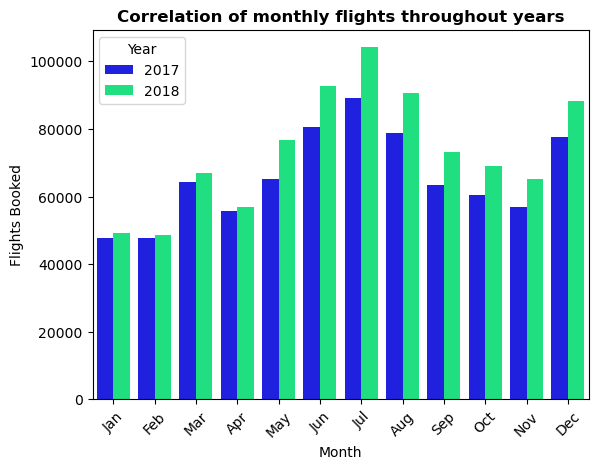

'\nIt is notable the consistency on the amoutn of monthly flights on both years. \nIt is also understandable the increase on flights on 2018 compared to previous year'

In [ ]:
# CORRELATION MONTHLY FLIGHTS AND BOOKINGS

df_m_y = df_full.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index() # GROUP BY MONTH AND YEAR, THAN ADD BOOKED

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_m_y['Month'] = df_m_y['Month'].apply(lambda x: month_names[x - 1]) # REPLACING NUMBERS ON RANGE FOR MONTHS, PROVIDED LIST AND INDEX TO REPLACE

sns.barplot(data=df_m_y, x='Month', 
            y='Flights Booked', 
            hue='Year', 
            palette='winter')

plt.xticks(rotation=45) # ROTATION TO NOT OVERLAY
plt.title('Correlation of monthly flights throughout years', fontweight='bold')
plt.show() # TO OCULT COMMENTS



#### G5. SCATTERPLOT: DISTANCY VS POINTS ACCUMULATED 

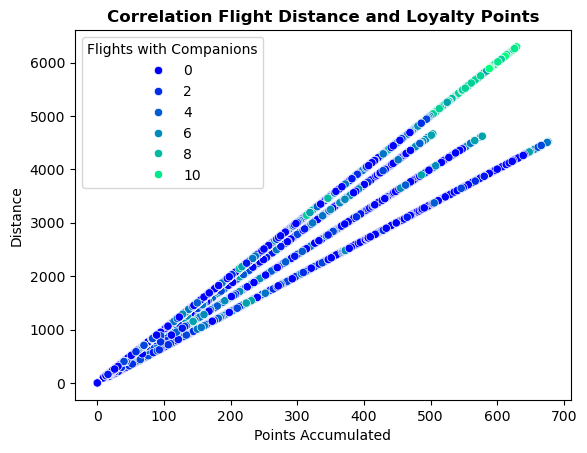

'\nThere is a clear positive correlation between these variables, as both increase simultaneously. \nIt can be stated that for every 1,000 units of distance, there is an increase of 100 points, which represents an average of 10%.\n\nThe heatmap highlights this correlation, and the graph also shows data for flights with companions.\nAnother interesting insight is that flights with companions are often associated with longer distances.\n'

In [ ]:
# CORRELATION DISTANCY AND ACCUMULATED POINTS

sns.scatterplot(data=df_full,
                y='Distance', 
                x='Points Accumulated', 
                hue='Flights with Companions', 
                palette='winter')

plt.title('Correlation Flight Distance and Loyalty Points', fontweight='bold')
plt.show()



#### G6. BARPLOT: CLIENT DISTRIBUTION BY PROVINCES

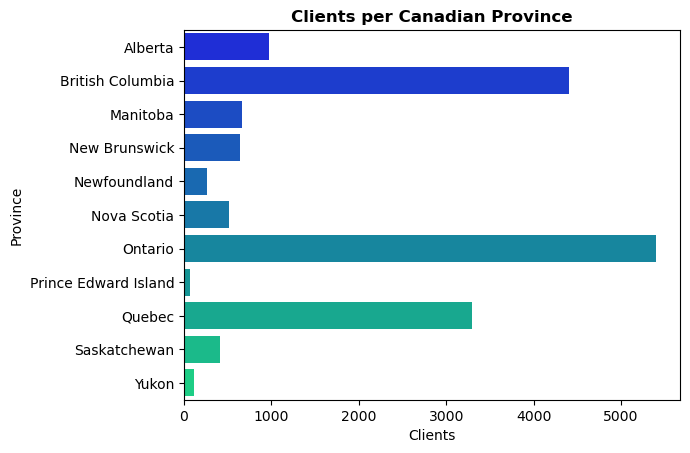

'\nThe grafic represents that Ontario, British Colombia and Quebec are the ones with more clients.\nRelation that is expected considering they are the most populated provinces(external source).\n'

In [ ]:
# CORRETATION OF CLIENTS BY PROVINCES
df_c_p = df_full.groupby('Province')['Loyalty Number'].nunique().reset_index() 
sns.barplot(data=df_c_p, y='Province', 
            x='Loyalty Number', 
            hue= 'Province', 
            palette='winter')

plt.xlabel('Clients') # THE COUNTER IS BASED ON LOYALTY NUMBER, X WAS RENAMED TO BETTER REPRESENT THE DATA
plt.title('Clients per Canadian Province', fontweight='bold')
plt.show()



#### G7. CROSSTAB & BARPLOT: CLIENTS' SALARY VS EDUCATION LEVEL

In [39]:
# CORRELATIONN SALARY AND EDUCATION LEVEL FROM CLIENTS/ NOT CONSIDERING NULLS

correctorder = ['Low', 'Medium', 'High']
df_full['Salary Scale'] = pd.Categorical(df_full['Salary Scale'], 
                                         categories=correctorder, 
                                         ordered=True) # ADDED TO CORRECT ORDER BY THE LIST, NOT ALPHABETICALY AS DEFAULT

cross_cate = pd.crosstab(df_full['Salary Scale'], 
                         df_full['Education'])
cross_cate

Education,Bachelor,Doctor,High School or Below,Master
Salary Scale,,,,
Low,252567,5738,18915,12287
Medium,0,10721,0,0
High,0,1272,0,0


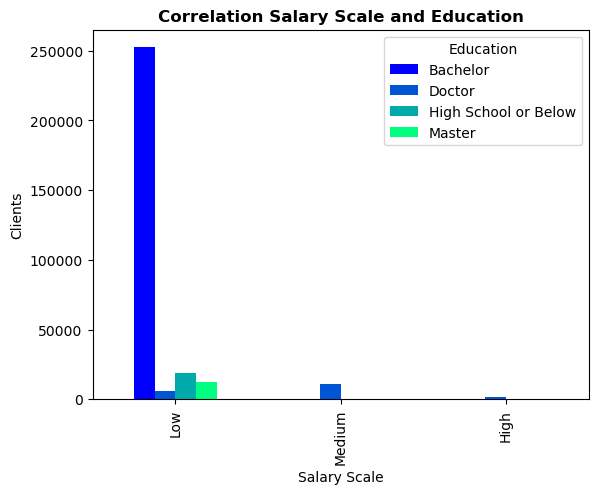

'\nFirst, you can observe that the majority of the clients have a bachelor degree and have low salary in the range.\nFollowed by a small representation of other education level in this salary range.\n\nSecond, clients with doctor degree are predominant classified as medium salary and high salary range\n\n'

In [ ]:
# CORRELATIONN SALARY AND EDUCATION LEVEL FROM CLIENTS
cross_cate.plot(kind='bar', 
                stacked=False, 
                colormap='winter')

plt.title('Correlation Salary Scale and Education',fontweight='bold')
plt.xlabel('Salary Scale')
plt.ylabel('Clients')
plt.legend(title='Education')
plt.show()


#### G8. BAR PLOT: PROPORTION OF CLIENTS AND LOYALTY CARDS

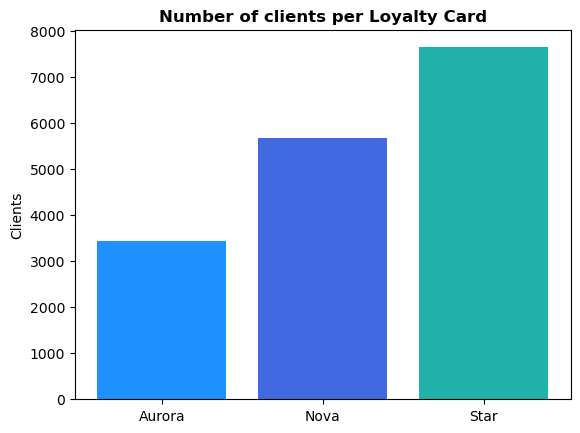

In [42]:
# PROPORTION OF CLIENTS AND LOYALTY CARDS

df_lc_ln = df_full.groupby('Loyalty Card')['Loyalty Number'].nunique().reset_index() # GROUPING BY CARD TYPE AND COUNTING UNIQUE VALUES


plt.bar(df_lc_ln['Loyalty Card'], 
        df_lc_ln['Loyalty Number'], 
        color=['dodgerblue', 'royalblue','lightseagreen'])

plt.ylabel('Clients')
plt.title('Number of clients per Loyalty Card',fontweight='bold')
plt.show()

C:\Users\ccpbu\AppData\Local\Temp\ipykernel_22600\3849572423.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_lc_salary = df_full.groupby(['Loyalty Card', 'Salary Scale'])['Loyalty Number'].nunique().reset_index()


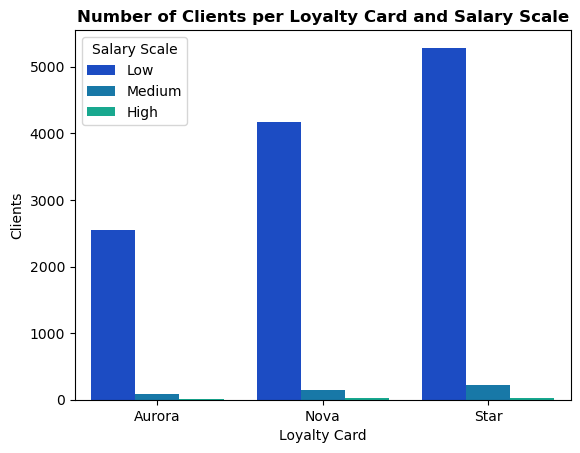

In [72]:
df_lc_salary = df_full.groupby(['Loyalty Card', 'Salary Scale'])['Loyalty Number'].nunique().reset_index()

sns.barplot(data=df_lc_salary, x='Loyalty Card', y='Loyalty Number', hue='Salary Scale', palette='winter')

plt.ylabel('Clients')
plt.title('Number of Clients per Loyalty Card and Salary Scale', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title='Salary Scale')
plt.show()

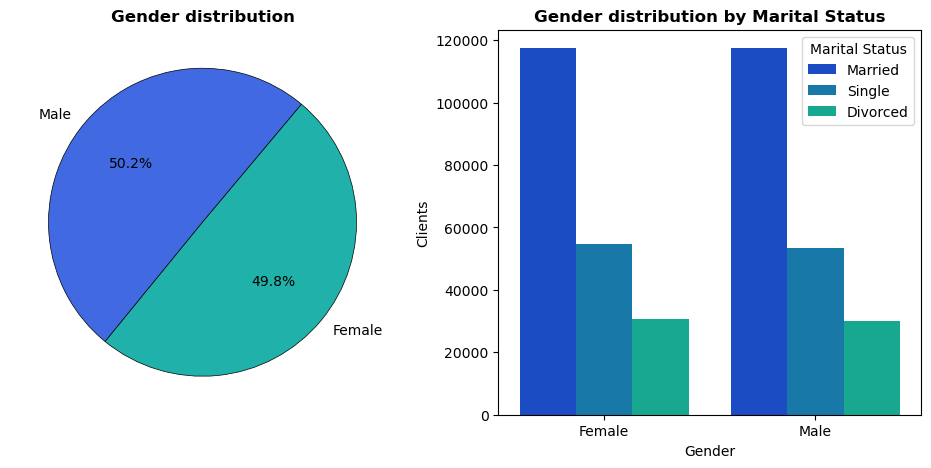

In [ ]:
# DISTRIBUITION BY GENDER AND MARITAL STATUS

df_g = df_full['Gender'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 


# FIRST SUBPLOT:

axes[0].pie(df_g, # INDEXING THE GRAPHIC POSITION ON THE PLOTS
            autopct='%1.1f%%', # ADDING PORCENTAGE AND DETERMINATING A SINGLE DECIMAL
            colors=['royalblue', 'lightseagreen'], 
            labels=['Male', 'Female'], 
            startangle=50,wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
axes[0].set_title('Gender distribution', fontweight='bold') # ADDING TITLE TO THIS GRAPHIC



# SECOND SUBPLOT

sns.countplot(x='Gender', # DOES NOT REQUIRE INDEXATION, SINCE ONLY ONE IS LEFT
              data=df_full, 
              palette='winter', 
              hue='Marital Status', 
              ax=axes[1])  # Specify the axis for the countplot
axes[1].set_ylabel('Clients')
axes[1].set_title('Gender distribution by Marital Status', fontweight='bold')

plt.show()

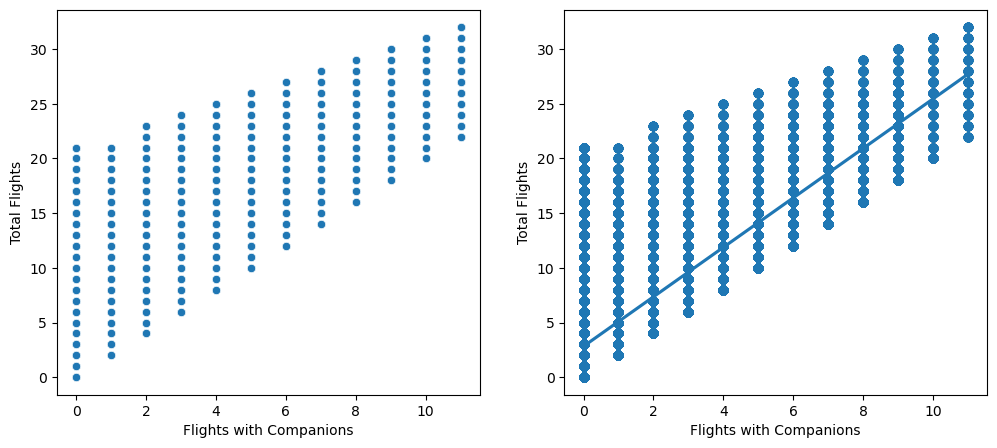

In [43]:
# APPLYING METHOD TO ANALIZE 2 NUMERIC VALUES USING DIFFERENT GRAPHIC TYPES - TESTING ONLY

sp.num_and_num (df_full,'Flights with Companions', 'Total Flights')